In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , accuracy_score
pd.set_option("display.max_column",200)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

In [3]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [5]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


## cleaning the dataset

In [7]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               348 non-null    int64  
 1   Gender                    348 non-null    object 
 2   Age                       348 non-null    int64  
 3   City                      348 non-null    object 
 4   Membership Type           348 non-null    object 
 5   Total Spend               348 non-null    float64
 6   Items Purchased           348 non-null    int64  
 7   Average Rating            348 non-null    float64
 8   Discount Applied          348 non-null    bool   
 9   Days Since Last Purchase  348 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 30.2+ KB


In [10]:
df.duplicated().sum()

0

## EDA 

In [12]:
df['Gender'].value_counts().reset_index()

,Gender,count
0,Male,175
1,Female,173


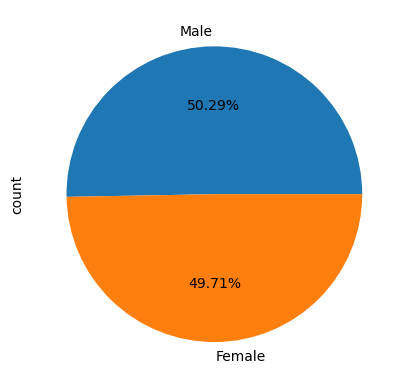

In [13]:
df['Gender'].value_counts().plot(kind='pie',autopct = "%1.2f%%")
plt.show()

In [14]:
df['Age'].value_counts().reset_index()

,Age,count
0,30,48
1,32,33
2,43,25
3,27,25
4,31,25
5,35,25
6,36,25
7,34,24
8,41,24
9,28,24


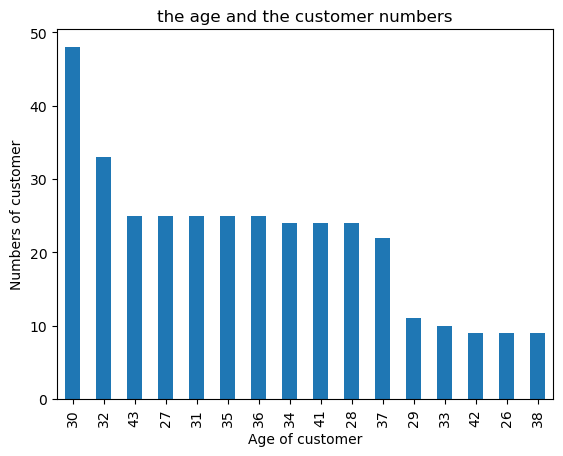

In [15]:
df['Age'].value_counts().plot(kind='bar')
plt.xlabel('Age of customer')
plt.ylabel('Numbers of customer')
plt.title('the age and the customer numbers')
plt.show()

In [16]:
df['City'].value_counts().reset_index()

,City,count
0,New York,59
1,Los Angeles,59
2,Chicago,58
3,San Francisco,58
4,Miami,58
5,Houston,56


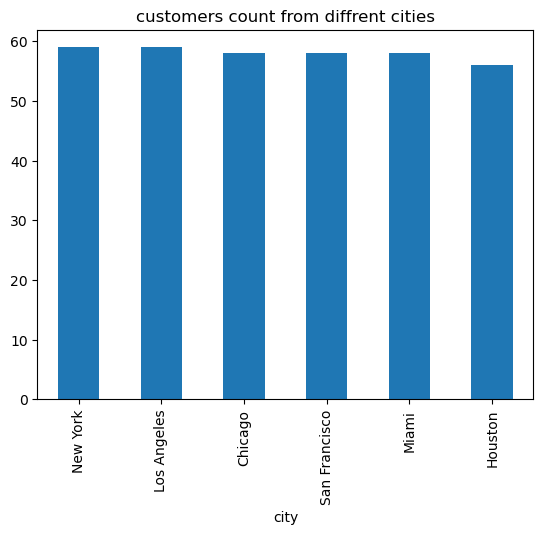

In [17]:
df['City'].value_counts().plot(kind='bar')
plt.xlabel('city')
plt.title('customers count from diffrent cities')
plt.show()

In [18]:
df['Membership Type'].value_counts().reset_index()

,Membership Type,count
0,Gold,117
1,Silver,117
2,Bronze,114


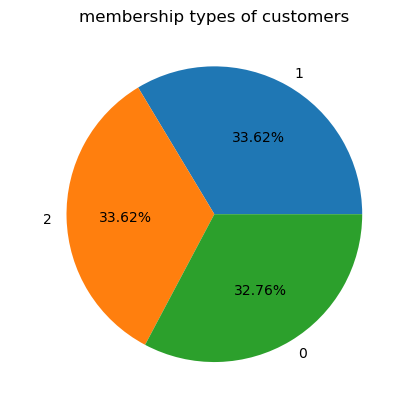

In [119]:
df['Membership Type'].value_counts().plot(kind='pie',autopct = '%1.2f%%')
plt.title('membership types of customers')
plt.ylabel(" ")
plt.show()

In [20]:
df['Satisfaction Level'].value_counts().reset_index()

,Satisfaction Level,count
0,Satisfied,125
1,Unsatisfied,116
2,Neutral,107


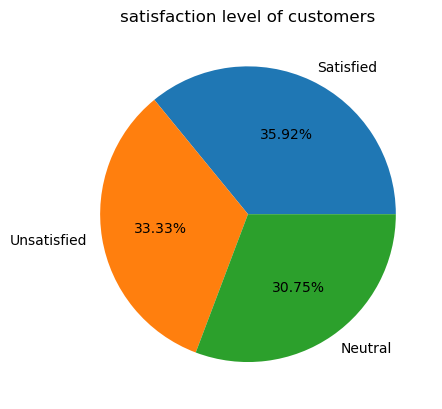

In [21]:
df['Satisfaction Level'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel(" ")
plt.title("satisfaction level of customers")
plt.show()

In [22]:
Gender_age = df.groupby('Gender')['Age'].mean()
Gender_age 

Gender
Female    36.427746
Male      30.760000
Name: Age, dtype: float64

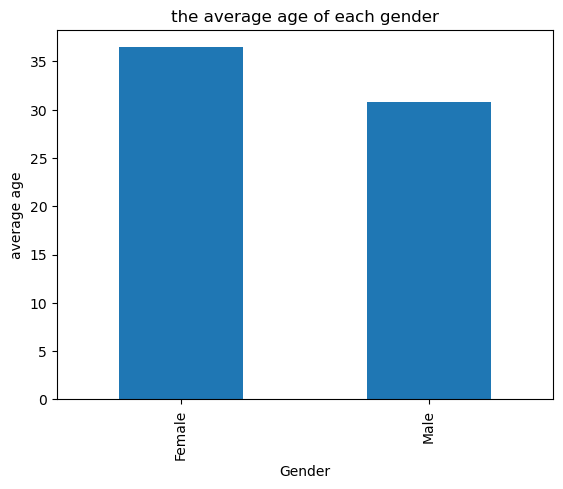

In [23]:
Gender_age.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('average age')
plt.title('the average age of each gender')
plt.show()

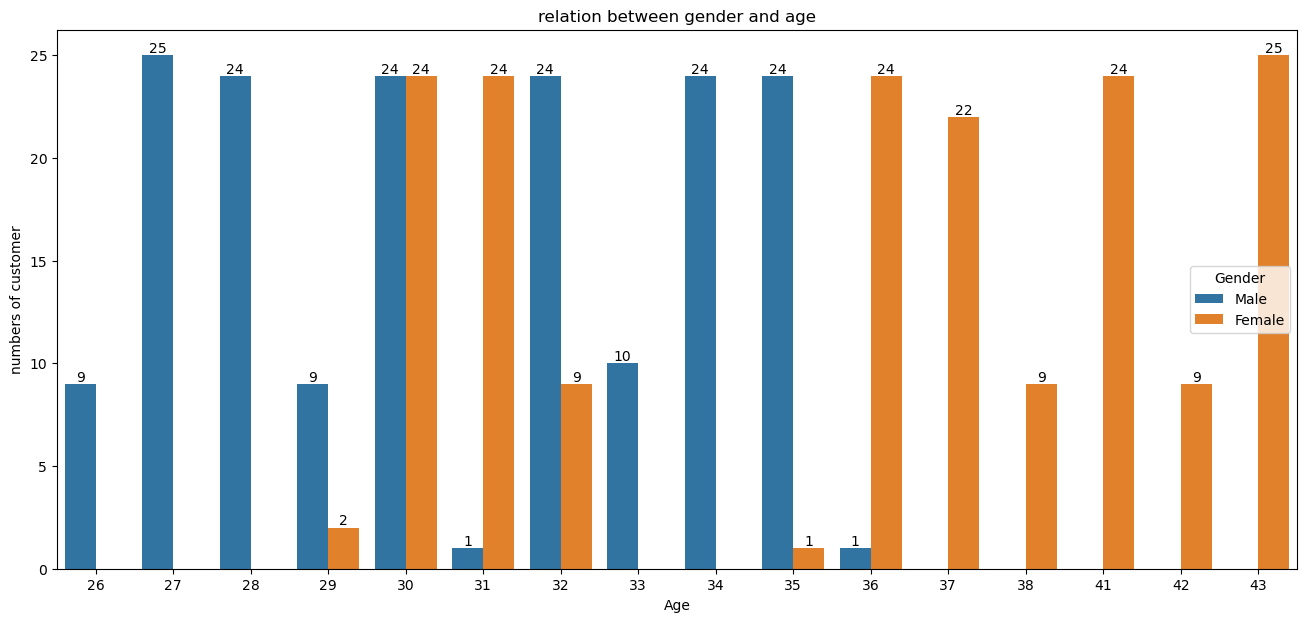

In [24]:
Gender_agedata = df[['Gender','Age']].value_counts().reset_index().sort_values(ascending=False,by='count')
plt.figure(figsize=(16,7))
ax = sns.barplot(data=Gender_agedata ,x='Age',y='count',hue='Gender')
for container in ax.containers:
    ax.bar_label(container,fmt='%.0f')
plt.xlabel('Age')
plt.ylabel('numbers of customer')
plt.title('relation between gender and age')
plt.show()

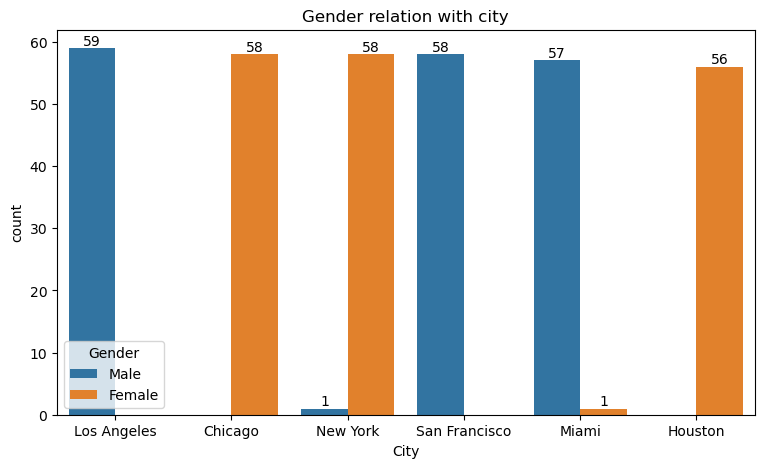

In [25]:
Gender_city = df[['Gender','City']].value_counts().reset_index().sort_values(ascending=False,by='count')
plt.figure(figsize=(9,5))
ex = sns.barplot(data=Gender_city,x='City',y='count',hue='Gender')

for container in ex.containers:
    ex.bar_label(container, fmt= '%.0f')

plt.title('Gender relation with city')
plt.show()

In [26]:
Gender_membership = df[['Gender','Membership Type']].value_counts().reset_index().sort_values(ascending=False,by='count')


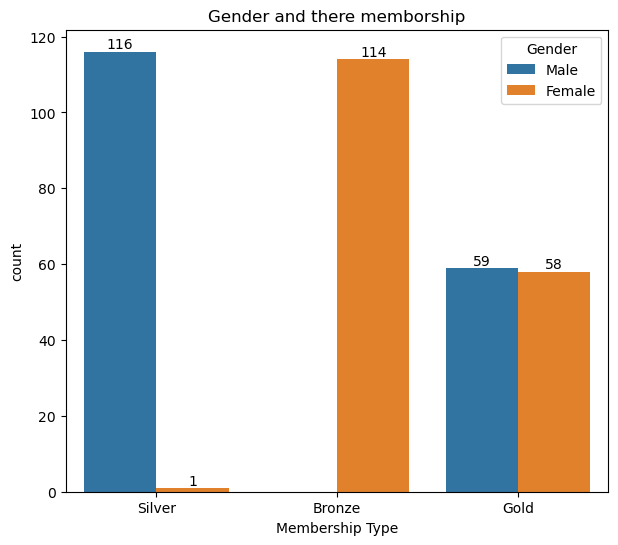

In [27]:
plt.figure(figsize=(7,6))
ax = sns.barplot(data=Gender_membership,x='Membership Type',y='count',hue='Gender')

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f')
plt.title('Gender and there memborship')
plt.show()


In [28]:
Gender_satis = df[['Gender','Satisfaction Level']].value_counts().reset_index().sort_values(ascending=False,by='count')

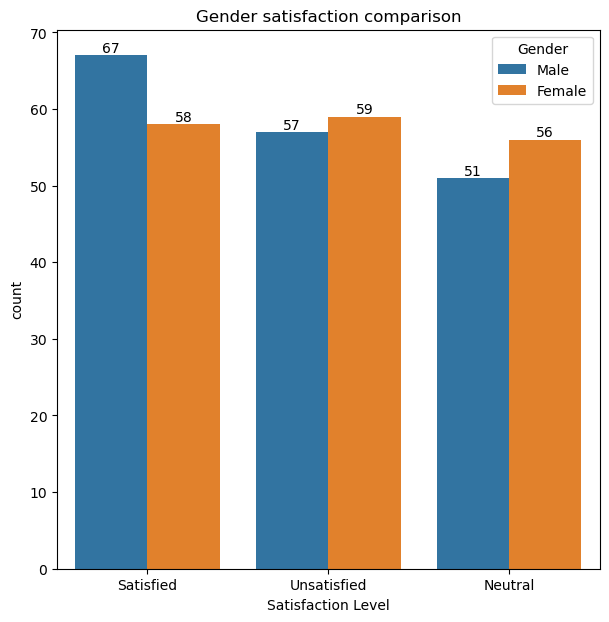

In [29]:
plt.figure(figsize=(7,7))
ax=sns.barplot(data=Gender_satis,x='Satisfaction Level',y='count',hue='Gender')

for container in ax.containers:
    ax.bar_label(container,fmt='%.0f')
plt.title('Gender satisfaction comparison')
plt.show()

In [30]:
Gender_Average_spend = df.groupby('Gender')['Total Spend'].sum()
Gender_Average_spend

Gender
Female    122318.4
Male      172713.6
Name: Total Spend, dtype: float64

In [31]:
df['Total Spend'].sum()

295032.0

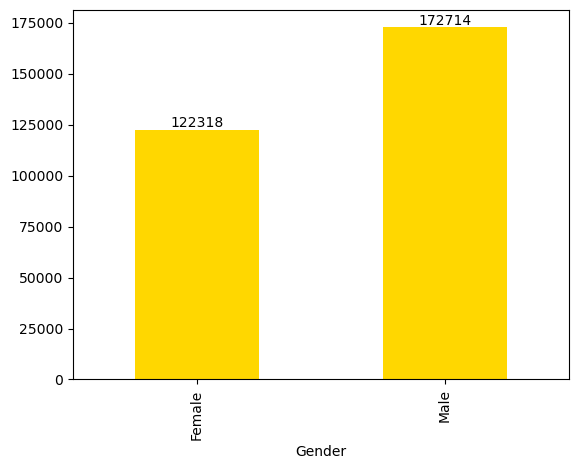

In [32]:
ax = Gender_Average_spend.plot(kind='bar',color='gold')
for container in ax.containers:
    ax.bar_label(container,fmt='%.0f')


In [33]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [34]:
Gender_purchase = df.groupby('Gender')['Items Purchased'].sum()
Gender_purchase

Gender
Female    1869
Male      2527
Name: Items Purchased, dtype: int64

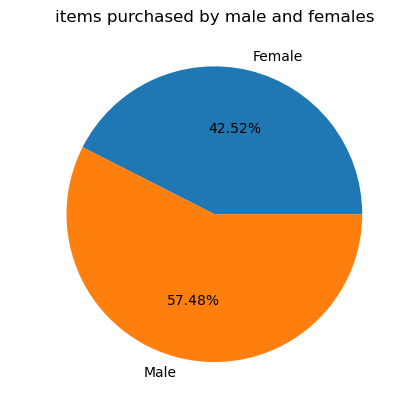

In [35]:
Gender_purchase.plot(kind='pie',autopct='%1.2f%%')
plt.ylabel(" ")
plt.title("items purchased by male and females")
plt.show()

In [36]:
Gender_average_ratings = df.groupby('Gender')['Average Rating'].mean()

In [37]:
Gender_average_ratings

Gender
Female    3.736994
Male      4.306857
Name: Average Rating, dtype: float64

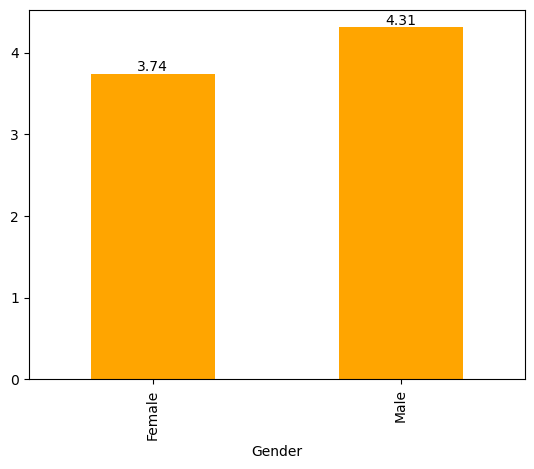

In [38]:
ax = Gender_average_ratings.plot(kind='bar',color='orange')
for container in ax.containers:
    ax.bar_label(container,fmt='%.02f')


In [39]:
city_average_item_purchase = df.groupby('City')['Items Purchased'].sum()
city_average_spend = df.groupby('City')['Total Spend'].sum()
city_average_ratings = df.groupby('City')['Average Rating'].mean()


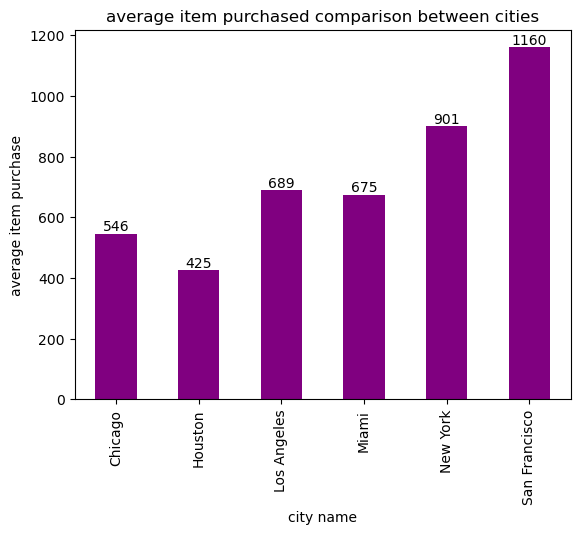

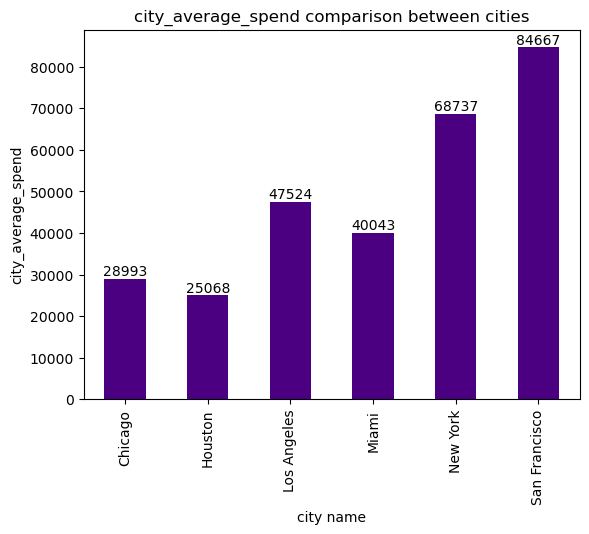

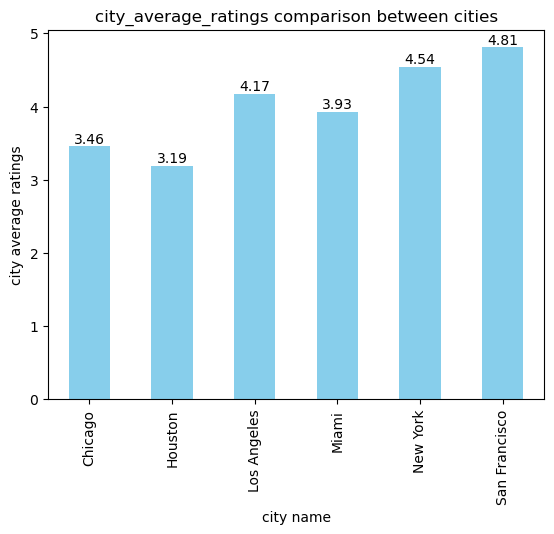

In [40]:
ax = city_average_item_purchase.plot(kind='bar',color='purple')
for container in ax.containers:
    ax.bar_label(container,fmt='%.0f')
plt.xlabel('city name')
plt.ylabel('average item purchase')
plt.title('average item purchased comparison between cities')
plt.show()

bx = city_average_spend.plot(kind='bar',color='indigo')
for container in bx.containers:
    bx.bar_label(container,fmt='%.0f')
plt.xlabel('city name')
plt.ylabel('city_average_spend')
plt.title('city_average_spend comparison between cities')
plt.show()

cx = city_average_ratings.plot(kind='bar',color='skyblue')
for container in cx.containers:
    cx.bar_label(container,fmt='%.02f')
plt.xlabel('city name')
plt.ylabel('city average ratings')
plt.title('city_average_ratings comparison between cities')
plt.show()

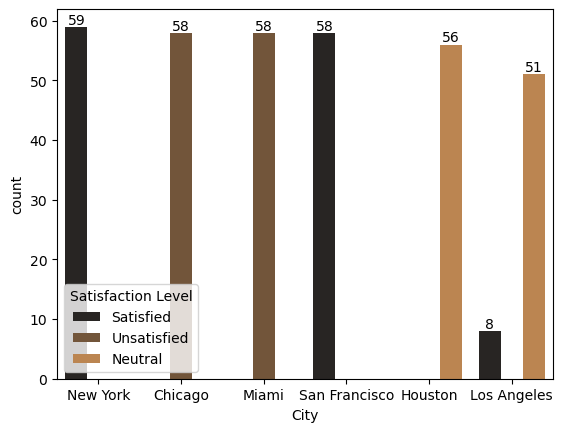

<Figure size 600x800 with 0 Axes>

In [41]:
city_satisfaction = df[['City','Satisfaction Level']].value_counts().reset_index().sort_values(ascending=False,by='count')
dx = sns.barplot(data=city_satisfaction,x='City',y='count',color='peru',hue='Satisfaction Level')
plt.figure(figsize=(6,8))
for container in dx.containers:
    dx.bar_label(container,fmt='%.0f')
plt.show()



In [42]:
city_satisfaction

,City,Satisfaction Level,count
0,New York,Satisfied,59
1,Chicago,Unsatisfied,58
2,Miami,Unsatisfied,58
3,San Francisco,Satisfied,58
4,Houston,Neutral,56
5,Los Angeles,Neutral,51
6,Los Angeles,Satisfied,8


In [43]:
average_sat_and_rat = df[['Satisfaction Level','Average Rating']].value_counts().reset_index()
average_sat_and_rat.groupby('Satisfaction Level')['Average Rating'].mean().reset_index()

,Satisfaction Level,Average Rating
0,Neutral,3.622222
1,Satisfied,4.550000
2,Unsatisfied,3.700000


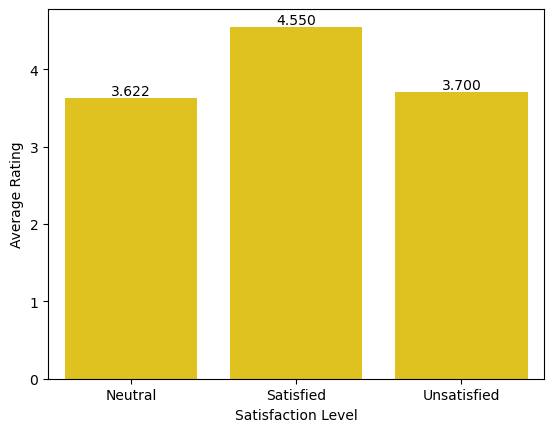

In [44]:
satis_and_rat = average_sat_and_rat.groupby('Satisfaction Level')['Average Rating'].mean().reset_index()
ax=sns.barplot(data=satis_and_rat,x='Satisfaction Level',y='Average Rating',color='gold')
for container in ax.containers:
    ax.bar_label(container,fmt='%.03f')

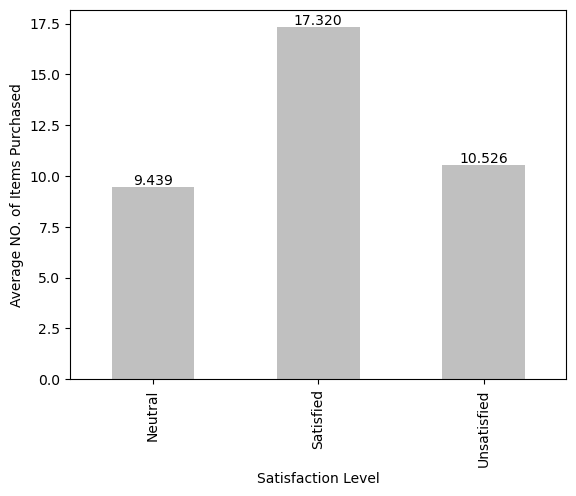

In [45]:
satisfaction_items = df.groupby('Satisfaction Level')['Items Purchased'].mean()
ax=satisfaction_items.plot.bar(color='silver')
for container in ax.containers:
    ax.bar_label(container,fmt='%.03f')
plt.ylabel('Average NO. of Items Purchased')
plt.show()

In [121]:
correlation_matrix = df.corr()

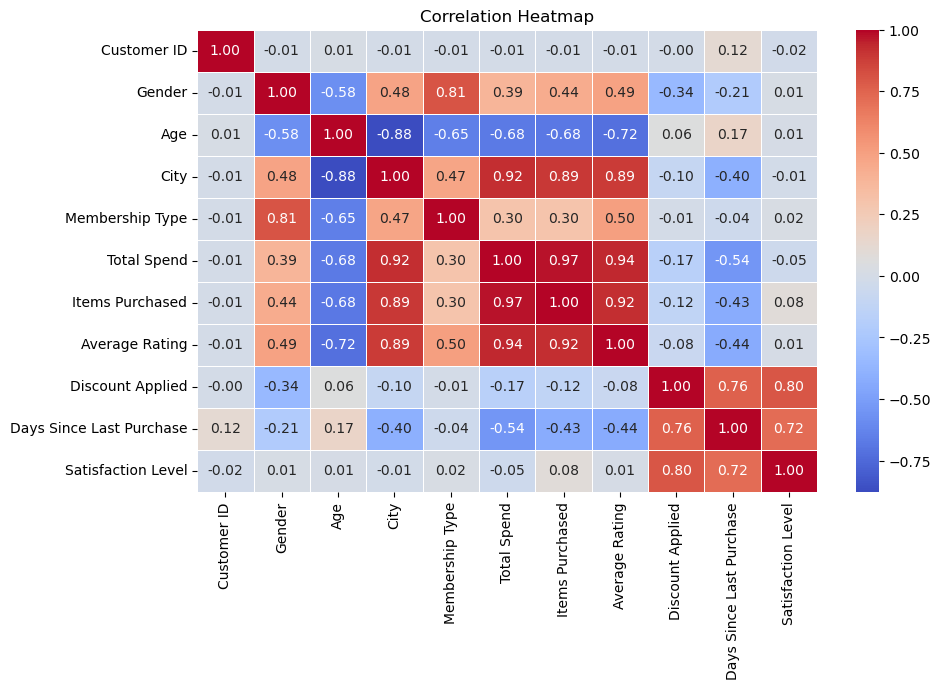

In [123]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [46]:
## predicting satisfaction using random forest 

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [48]:
# Encode categorical columns
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['City'] = label_encoder.fit_transform(df['City'])
df['Membership Type'] = label_encoder.fit_transform(df['Membership Type'])
df['Satisfaction Level'] = label_encoder.fit_transform(df['Satisfaction Level'])


In [49]:
# Features and target
X = df.drop(columns=['Satisfaction Level', 'Customer ID'])
y = df['Satisfaction Level']

In [50]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report for more detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9857
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        19

    accuracy                           0.99        70
   macro avg       0.99      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70



In [53]:
sample_input = np.array([[1, 25, 2, 1, 200.5, 5, 4.2, 1, 10]])
predicted_satisfaction = model.predict(sample_input)
predicted_satisfaction_label = label_encoder.inverse_transform(predicted_satisfaction)
print(f'Predicted Satisfaction Level: {predicted_satisfaction_label[0]}')

Predicted Satisfaction Level: Neutral


In [54]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [55]:
sample_input2 = np.array([[2,22,1,2,400.0,5,4.9,2,10]])
predicted_satisfaction = model.predict(sample_input2)
predicted_satisfaction_label = label_encoder.inverse_transform(predicted_satisfaction)
print(f"predicted satisfaction label : {predicted_satisfaction_label[0]}")

predicted satisfaction label : Neutral
